In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split



In [4]:
import pandas as pd
d = pd.read_csv("C:/SENTI-PREDICT/IMDB Dataset.csv")
df = pd.DataFrame(d)
print(d)


                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'sentiment distribution')

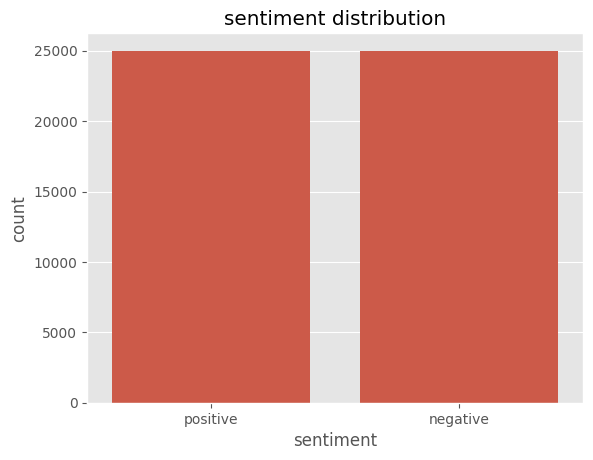

In [6]:
sns.countplot(x='sentiment',data=df)
plt.title("sentiment distribution")

In [7]:
for i in range(5):
    print("Reviews:",[i])
    print(df['review'].iloc[i],"\n")
    print("sentiment:",df["sentiment"].iloc[i],"\n\n")

Reviews: [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [8]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [9]:
df['word count'] = df['review'].apply(no_of_words)

In [10]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


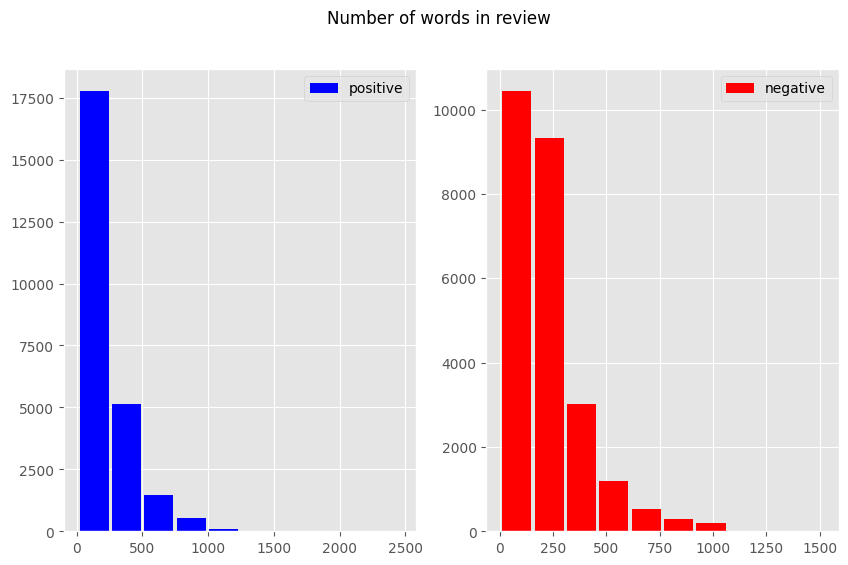

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment']=='positive']['word count'], label='positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['word count'], label='negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()


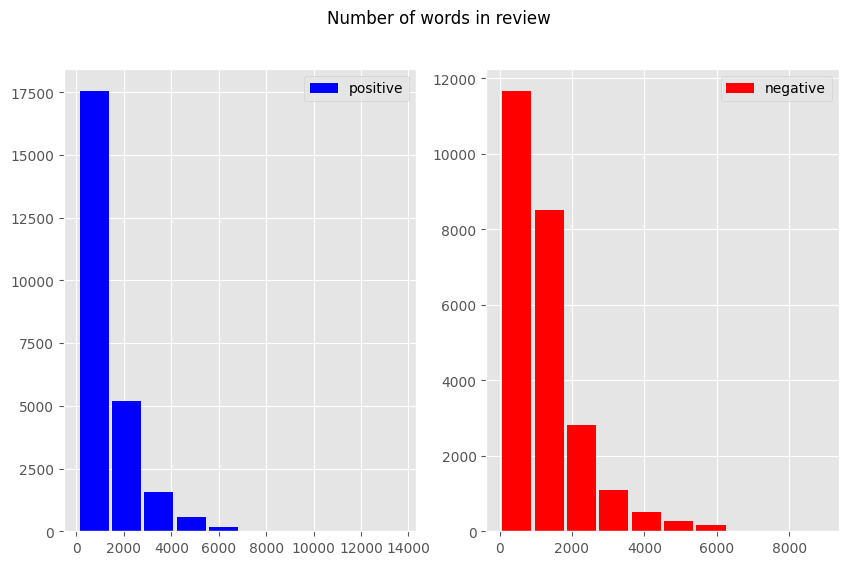

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment']=='positive']['review'].str.len(), label='positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['review'].str.len(), label='negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [13]:
df.sentiment.replace("positive",1, inplace=True)
df.sentiment.replace("negative",0, inplace=True)

C:\Users\gemba\AppData\Local\Temp\ipykernel_2092\19000496.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive",1, inplace=True)
C:\Users\gemba\AppData\Local\Temp\ipykernel_2092\19000496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [14]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [15]:
def data_processing(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r"https\S+|www\S+|http\s+",'',text,flags=re.MULTILINE)
    text =re.sub(r'\@w+|\#','',text)
    text =re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Define stop words
stop_words = set(stopwords.words('english'))

# Define a function to process text
def data_processing(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# Assuming 'df' is your DataFrame
df['review'] = df['review'].apply(data_processing)


In [17]:
duplicated_count=df.duplicated().sum()
print("Number of duplicate entries:",duplicated_count)

Number of duplicate entries: 419


In [18]:
df=df.drop_duplicates('review')

In [19]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word)for word in data]
    return data

In [20]:
df.review=df['review'].apply(lambda x: stemming(x))

In [21]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One reviewers mentioned watching 1 Oz episode ...,1,252
1,A wonderful little production . < br / > < br ...,1,136
2,I thought wonderful way spend time hot summer ...,1,135
3,Basically 's family little boy ( Jake ) thinks...,0,114
4,Petter Mattei 's `` Love Time Money '' visuall...,1,191


In [22]:
pos_reviews=df[df.sentiment==1]
pos_reviews.head()

,review,sentiment,word count
0,One reviewers mentioned watching 1 Oz episode ...,1,252
1,A wonderful little production . < br / > < br ...,1,136
2,I thought wonderful way spend time hot summer ...,1,135
4,Petter Mattei 's `` Love Time Money '' visuall...,1,191
5,"Probably all-time favorite movie , story selfl...",1,87


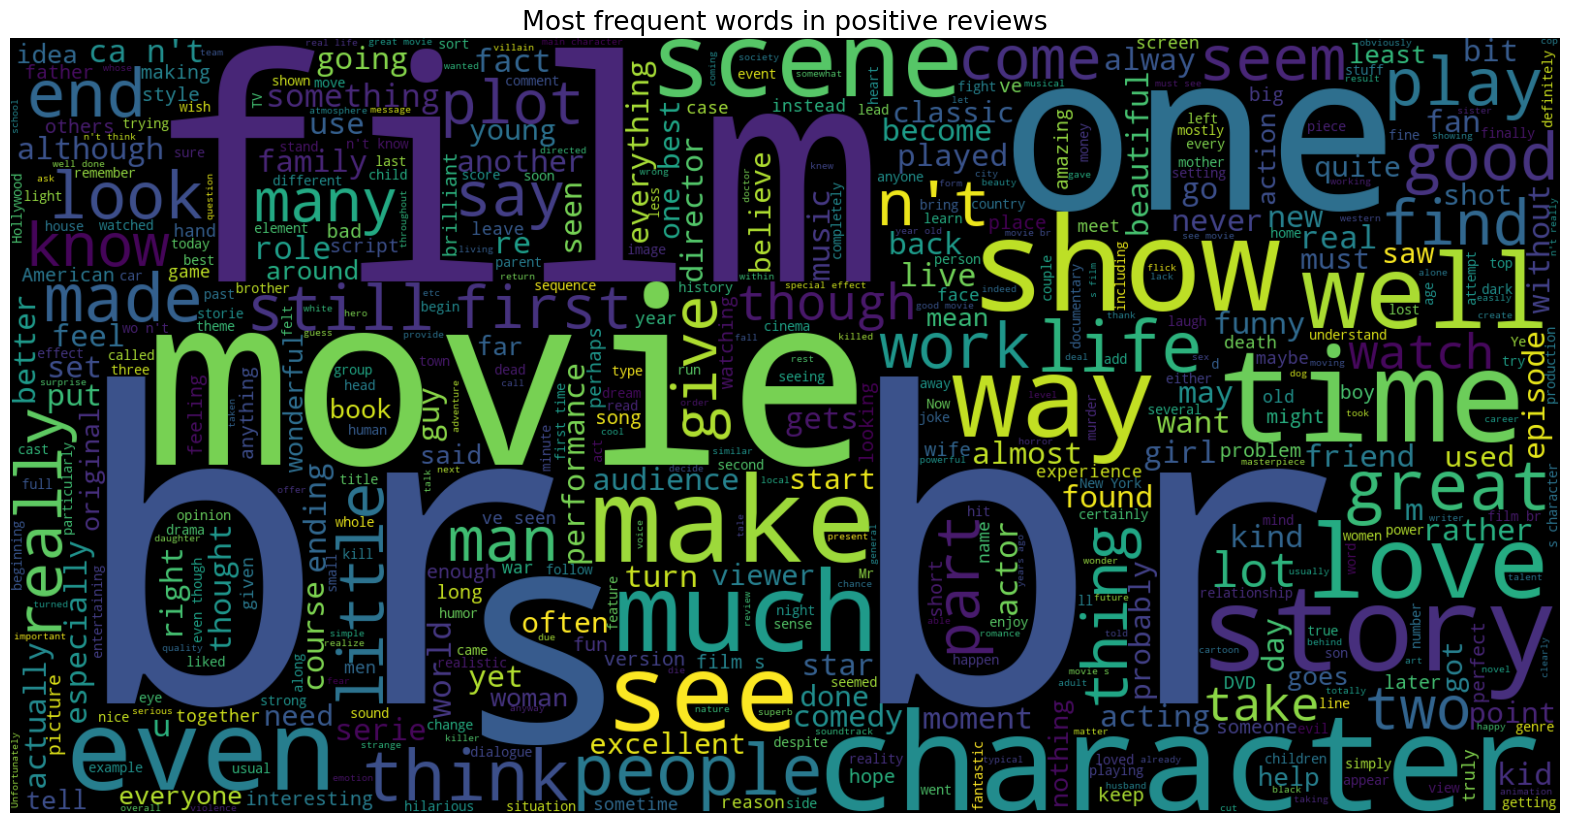

In [23]:
from wordcloud import WordCloud


text=' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize=19)
plt.show()

In [24]:
from collections import Counter
import re

count = Counter()
for text in pos_reviews['review'].values:
    words = re.findall(r'\b\w+\b', text.lower())  # Find all words (sequences of alphanumeric characters)
    count.update(words)

count.most_common(15)


[('br', 97596),
 ('i', 76398),
 ('s', 64131),
 ('the', 46750),
 ('film', 41967),
 ('movie', 37653),
 ('one', 27209),
 ('t', 27143),
 ('n', 26754),
 ('it', 20148),
 ('like', 17650),
 ('this', 15468),
 ('good', 14961),
 ('story', 12897),
 ('great', 12885)]

In [25]:
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,br,97596
1,i,76398
2,s,64131
3,the,46750
4,film,41967


In [26]:
px.bar(pos_words,x='count',y='word',title='common words in positive reviews',color='word')

In [26]:
neg_reviews = df[df['sentiment'] == 0]
neg_reviews.head()


,review,sentiment,word count
3,Basically 's family little boy ( Jake ) thinks...,0,114
7,"This show amazing , fresh & innovative idea 70...",0,126
8,Encouraged positive comments film I looking fo...,0,98
10,Phil Alien one quirky films humour based aroun...,0,95
11,I saw movie I 12 came . I recall scariest scen...,0,130


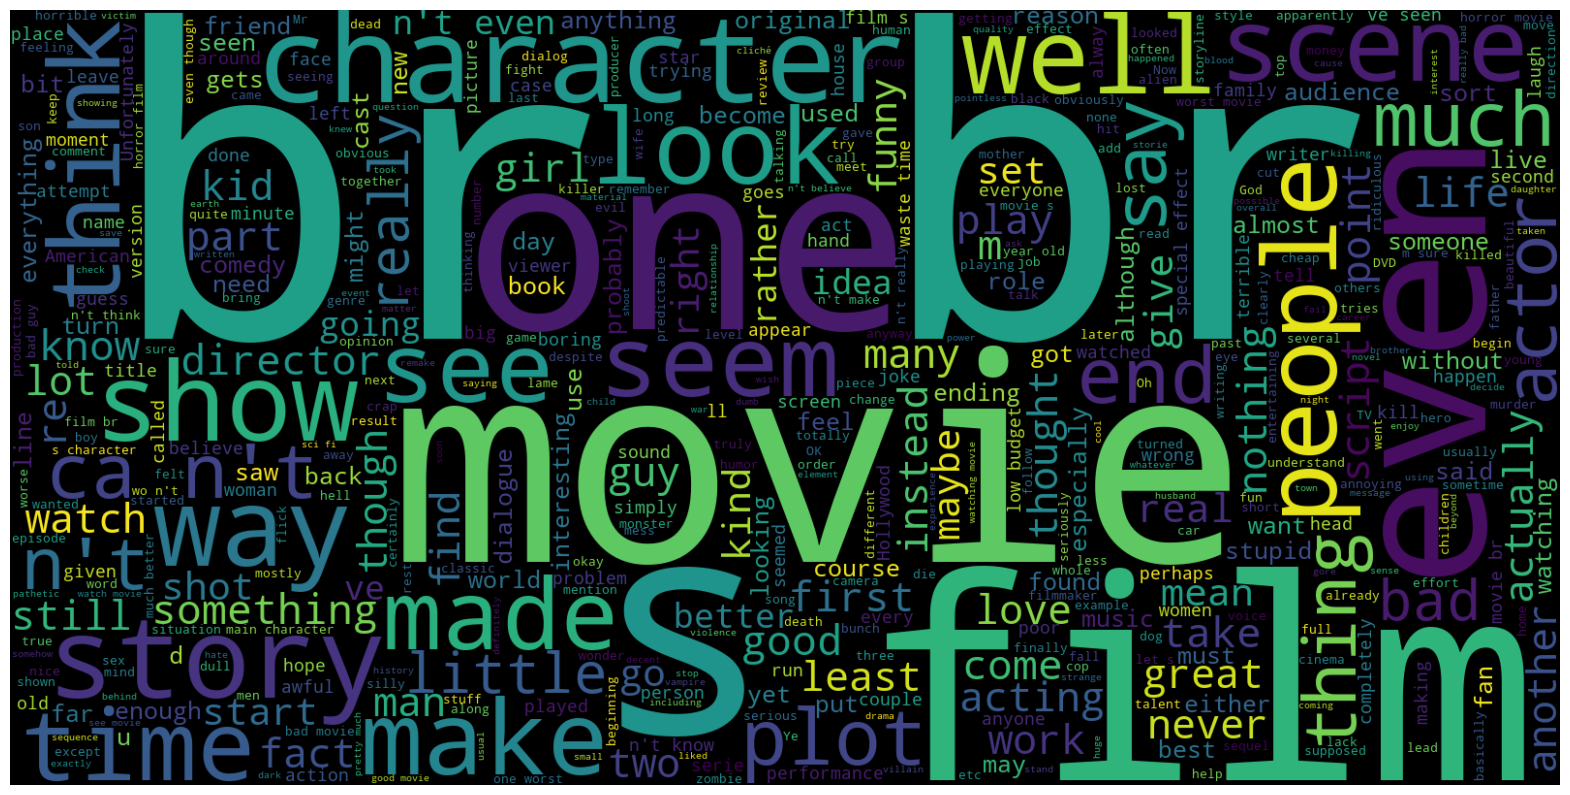

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check if neg_reviews['review'] contains any words
if len(neg_reviews['review']) > 0:
    text = ' '.join([word for word in neg_reviews['review']])
    plt.figure(figsize=(20, 15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No words found in neg_reviews['review'].",fontsize=19)


In [28]:
from collections import Counter
import re

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Create a Counter object
count = Counter()

# Iterate over each review and update the Counter
for text in neg_reviews['review'].values:
    cleaned_text = clean_text(text)
    for word in cleaned_text.split():
        count[word] += 1

# Get the most common words
count.most_common(15)


[('i', 87354),
 ('s', 61578),
 ('movie', 49617),
 ('the', 47054),
 ('t', 40156),
 ('n', 39529),
 ('film', 37180),
 ('one', 25995),
 ('like', 22192),
 ('it', 18470),
 ('would', 15172),
 ('even', 15095),
 ('this', 14871),
 ('good', 14581),
 ('bad', 14563)]

In [29]:
neg_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])


In [30]:
neg_words.head()

,word,count
0,i,87354
1,s,61578
2,movie,49617
3,the,47054
4,t,40156


In [31]:
px.bar(neg_words,x='count',y='word',title='common words in negative reviews',color='word')

In [32]:
x=df['review']
y=df['sentiment']


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
x = vect.fit_transform(df['review'])


In [34]:
x_train,x_test ,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
print('size of x_train:',(x_train.shape))
print('size of y_train:',(y_train.shape))
print('size of x_test:',(x_test.shape))
print('size of y_test:',(y_test.shape))

size of x_train: (34705, 101880)
size of y_train: (34705,)
size of x_test: (14874, 101880)
size of y_test: (14874,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))


Test accuracy: 89.67%


In [38]:
print(confusion_matrix(y_test,logreg_pred))
print('/n')
print(classification_report(y_test,logreg_pred))

[[6531  888]
 [ 649 6806]]
/n
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7419
           1       0.88      0.91      0.90      7455

    accuracy                           0.90     14874
   macro avg       0.90      0.90      0.90     14874
weighted avg       0.90      0.90      0.90     14874



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc * 100))

Test accuracy: 86.26%


In [40]:
print(confusion_matrix(y_test,mnb_pred))
print('/n')
print(classification_report(y_test,mnb_pred))

[[6459  960]
 [1083 6372]]
/n
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7419
           1       0.87      0.85      0.86      7455

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
svc=LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc * 100))

Test accuracy: 89.73%


In [42]:
print(confusion_matrix(y_test,svc_pred))
print('/n')
print(classification_report(y_test,svc_pred))

[[6570  849]
 [ 678 6777]]
/n
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7419
           1       0.89      0.91      0.90      7455

    accuracy                           0.90     14874
   macro avg       0.90      0.90      0.90     14874
weighted avg       0.90      0.90      0.90     14874



In [43]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'loss':['hinge','squared_hinge']}
grid=GridSearchCV(svc,param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.885 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.883 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.2s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.896 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.893 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.895 total time=   0.7s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [44]:
print("best cross validation score:{:.2f}".format(grid.best_score_))
print("best parameters:",grid.best_params_)

best cross validation score:0.89
best parameters: {'C': 1, 'loss': 'hinge'}


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
svc=LinearSVC(C=1,loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc * 100))

Test accuracy: 89.75%


In [46]:
print(confusion_matrix(y_test,svc_pred))
print('/n')
print(classification_report(y_test,svc_pred))

[[6573  846]
 [ 679 6776]]
/n
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7419
           1       0.89      0.91      0.90      7455

    accuracy                           0.90     14874
   macro avg       0.90      0.90      0.90     14874
weighted avg       0.90      0.90      0.90     14874



In [47]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(rfc_pred, y_test)
print("Test accuracy: {:.2f}%".format(rfc_acc * 100))

Test accuracy: 85.26%


In [49]:
print(confusion_matrix(y_test,rfc_pred))
print('/n')
print(classification_report(y_test,rfc_pred))

[[6300 1119]
 [1073 6382]]
/n
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7419
           1       0.85      0.86      0.85      7455

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted avg       0.85      0.85      0.85     14874



In [50]:
# Prompt user for input
user_input = input("Enter your text: ")

# Preprocess user input
cleaned_input = clean_text(user_input)  # Assuming you have a clean_text function for preprocessing

# Vectorize user input
vectorized_input = vect.transform([cleaned_input])

# Make prediction
prediction = rfc.predict(vectorized_input)

# Interpret prediction
if prediction[0] == 1:
    print("The sentiment of the input is positive.")
else:
    print("The sentiment of the input is negative.")



The sentiment of the input is positive.


In [51]:
# Prompt user for input
user_input = input("Enter your text: ")

# Preprocess user input
cleaned_input = clean_text(user_input)  # Assuming you have a clean_text function for preprocessing

# Vectorize user input
vectorized_input = vect.transform([cleaned_input])

# Make prediction
prediction = rfc.predict(vectorized_input)

# Interpret prediction
if prediction[0] == 1:
    print("The sentiment of the input is positive.")
else:
    print("The sentiment of the input is negative.")


The sentiment of the input is negative.


In [52]:
# Prompt user for input
user_input = input("Enter your text: ")

# Preprocess user input
cleaned_input = clean_text(user_input)  # Assuming you have a clean_text function for preprocessing

# Vectorize user input
vectorized_input = vect.transform([cleaned_input])

# Make prediction
prediction = rfc.predict(vectorized_input)

# Interpret prediction
if prediction[0] == 1:
    print("The sentiment of the input is positive.")
else:
    print("The sentiment of the input is negative.")


The sentiment of the input is positive.


In [53]:
joblib.dump(rfc, 'rfcfinal.joblib')


['rfcfinal.joblib']